In [114]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image,ImageOps
from pylab import *
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage
from scipy import ndimage

from skimage import feature

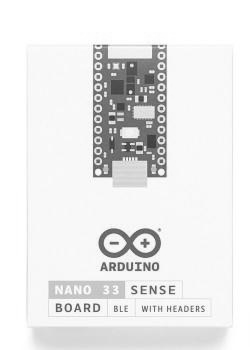

In [2]:
image = Image.open('arduino.jpeg')
gray_image = ImageOps.grayscale(image)


# box = (0,0,250,350)
# region = image.crop(box)
# region.save('region_color.jpeg')

# show image in a seperate window 
# image.show()

# to use PIL to show image in jupyter notebook
display(gray_image)



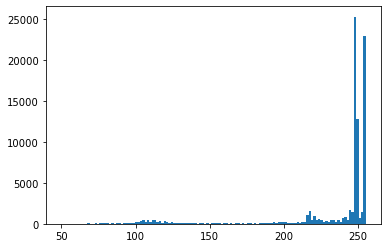

In [3]:
im = np.array(gray_image)

figure()
im_flatten = im.flatten()
# Compute and draw the histogram of x.
hist(im_flatten,128)
show()

(0.5, 249.5, 0.5, 349.5)

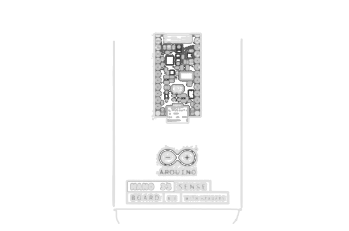

In [4]:
figure()
# don’t use colors
gray()
# show contours with origin upper left corner
contour(im, origin='image')
axis('equal')
axis('off')

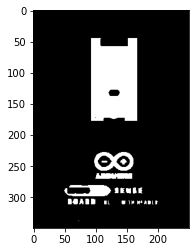

In [49]:
# ‘edge length’ weight parameter. Higher mu values will produce a ‘round’ edge, 
# while values closer to zero will detect smaller objects.
cv = seg.chan_vese(im,
                   mu=0.17,
                   lambda1=1,
                   lambda2=1,
                   tol=1e-3,
                   max_iter=200,
                   dt=0.5,
                   init_level_set="checkerboard",
                   extended_output=True)
figure()
plt.imshow(cv[0], cmap="gray")

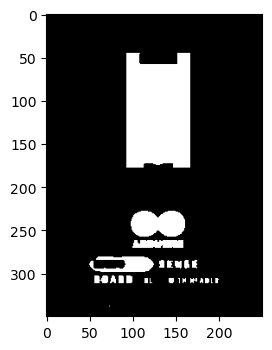

In [66]:
im_fill_holes = ndimage.binary_fill_holes(cv[0])
figure(dpi = 100)
plt.imshow(im_fill_holes)

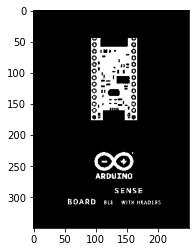

In [67]:
threshold = filters.threshold_otsu(im)
im_threshold = im < threshold
plt.imshow(im_threshold)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


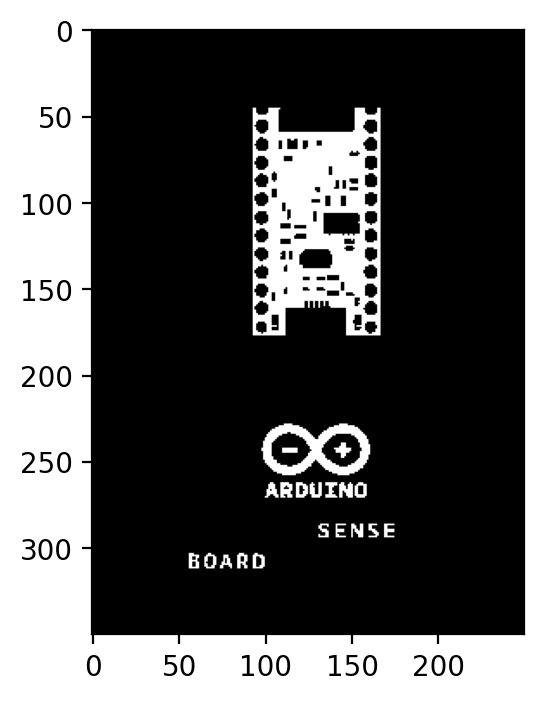

In [305]:
threshold_clean = skimage.morphology.remove_small_objects(im_threshold, 20)
print(im_fill_holes_240)
figure(dpi = 200)
plt.imshow(threshold_clean)

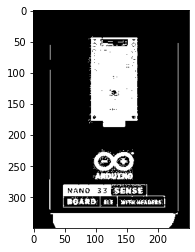

In [68]:
im_240 = (im < 240).astype(np.uint8) * 255
plt.imshow(im_240)

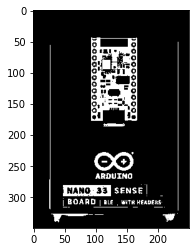

In [53]:
threshold_local = filters.threshold_local(im, block_size=51, offset=10)
im_threshold_local = im < threshold_local
plt.imshow(im_threshold_local)

In [59]:
print(cv[0])

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


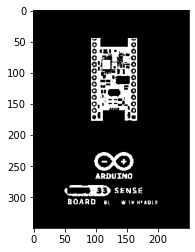

In [62]:
# convert True and False to 0 and 255
im_cv0 = cv[0].astype(np.uint8)
im_cv0 *= 255

im_threshold_local = im_threshold_local.astype(np.uint8)  #convert to an unsigned byte
im_threshold_local*=255

im1 = cv[0] * im_threshold_local
plt.imshow(im1)

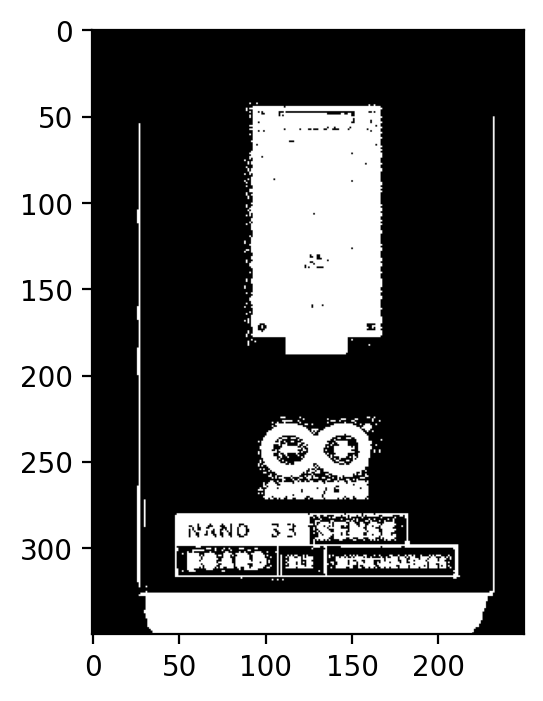

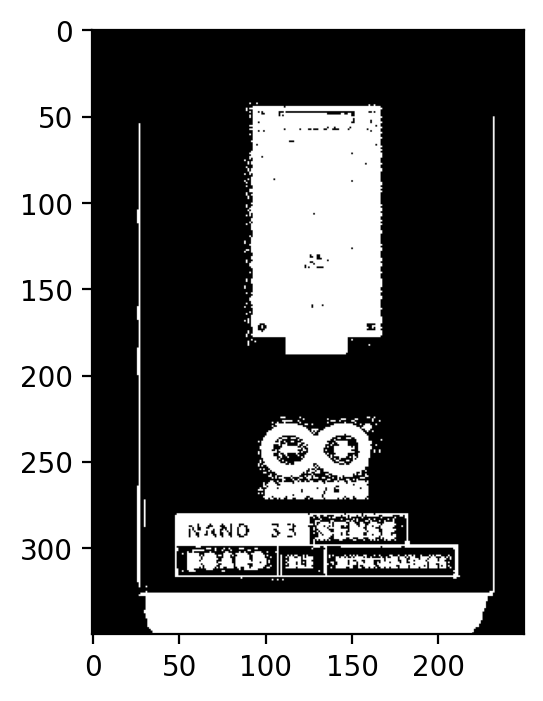

In [311]:
# 243 to get the gray box outside the letter
# 220 to get smooth arduino
im_240 = (im < 243).astype(np.uint8) * 255
figure(dpi=200)
plt.imshow(im_240)
#im_240 = im_240 * cv[0]
figure(dpi=200)
plt.imshow(im_240)

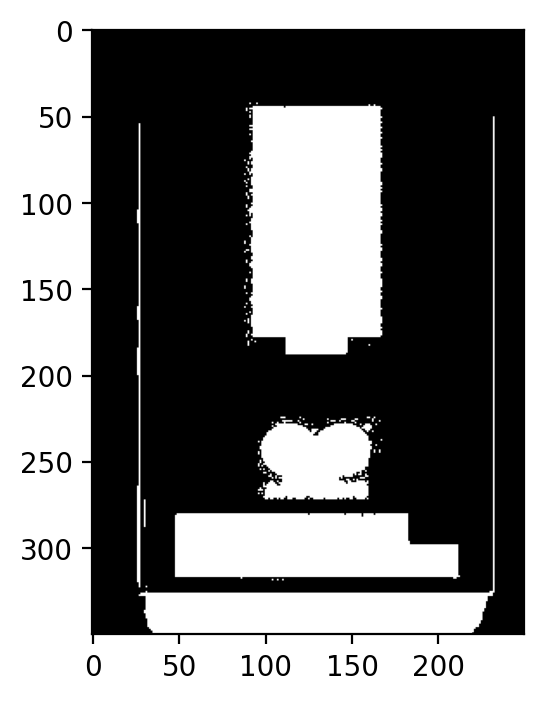

In [284]:
im_fill_holes_240 = ndimage.binary_fill_holes(im_240)
figure(dpi = 200)
plt.imshow(im_fill_holes_240)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


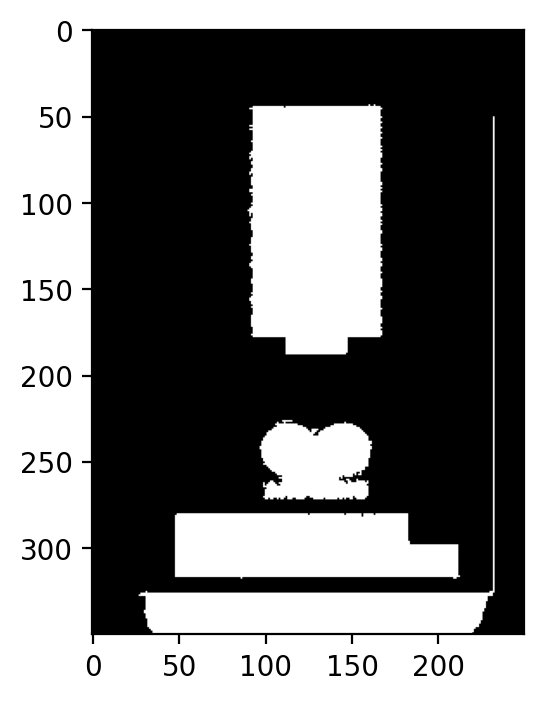

In [288]:
im_cleaned = skimage.morphology.remove_small_objects(im_fill_holes_240, 500)
print(im_fill_holes_240)
figure(dpi = 200)
plt.imshow(im_cleaned)

Number of objects: 4


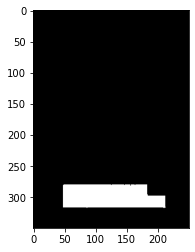

In [292]:
from scipy.ndimage import measurements,morphology
labels_clean, nbr_objects_clean = measurements.label(im_cleaned)
plt.imshow(labels_clean==4)
print ("Number of objects:", nbr_objects_clean)

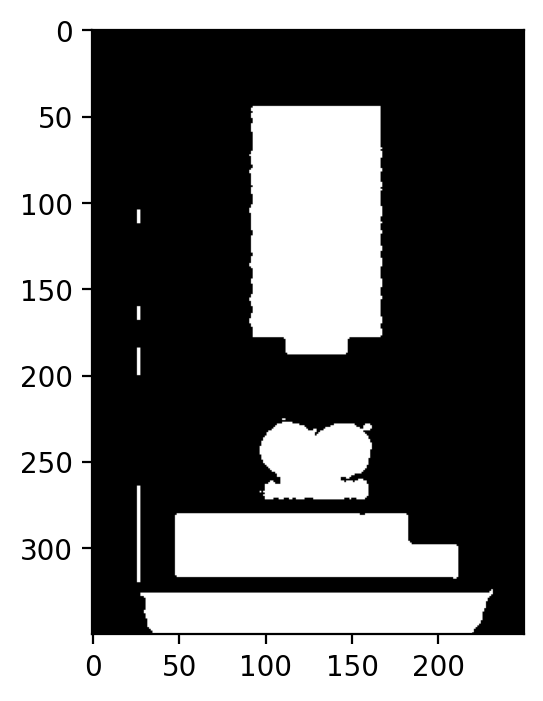

In [296]:
denoised = ndimage.median_filter(im_fill_holes_240, 3)
figure(dpi = 200)
plt.imshow(denoised)

Number of objects: 10


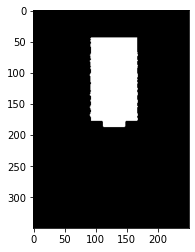

In [297]:
from scipy.ndimage import measurements,morphology
labels, nbr_objects = measurements.label(denoised)
plt.imshow(labels==1)
print ("Number of objects:", nbr_objects)

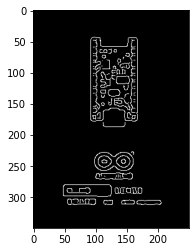

In [92]:
im_canny = feature.canny(im, sigma=2)
plt.imshow(im_canny)

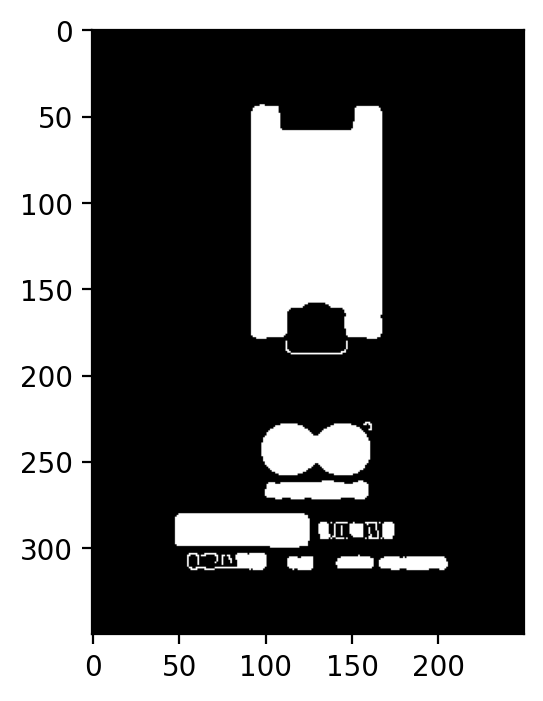

In [94]:
im_fill_holes_canny = ndimage.binary_fill_holes(im_canny)
figure(dpi = 200)
plt.imshow(im_fill_holes_canny)

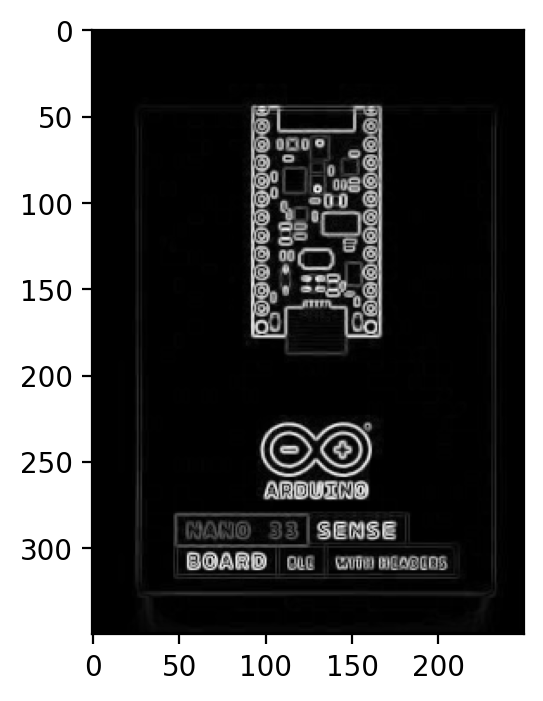

In [117]:
# Find edges in an image using the Sobel filter.
elevation_map = filters.sobel(im)

figure(dpi=200)
imshow(elevation_map, cmap=plt.cm.gray)

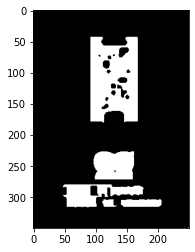

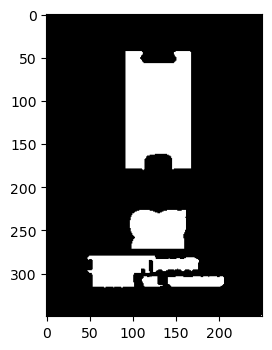

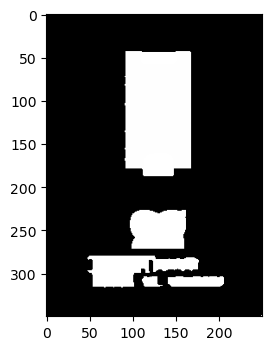

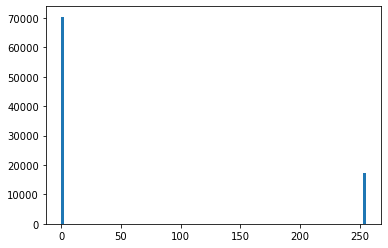

In [298]:
cv1 = seg.chan_vese(elevation_map,
                   mu=0.22,
                   lambda1=1,
                   lambda2=1,
                   tol=1e-3,
                   max_iter=200,
                   dt=0.5,
                   init_level_set="checkerboard",
                   extended_output=True)
figure()
plt.imshow(cv1[0], cmap="gray")
im_fill_holes_sobel = ndimage.binary_fill_holes(cv1[0]).astype(np.uint8) * 255

figure(dpi = 100)
plt.imshow(im_fill_holes_sobel)
label1 = (labels==1).astype(np.uint8) * 255

figure(dpi = 100)
plt.imshow(label1 + im_fill_holes_sobel ,cmap=plt.cm.gray)
final = label1 + im_fill_holes_sobel

final = (final > 0)*255

figure()
im_flatten = final.flatten()
hist(im_flatten,128)
show()

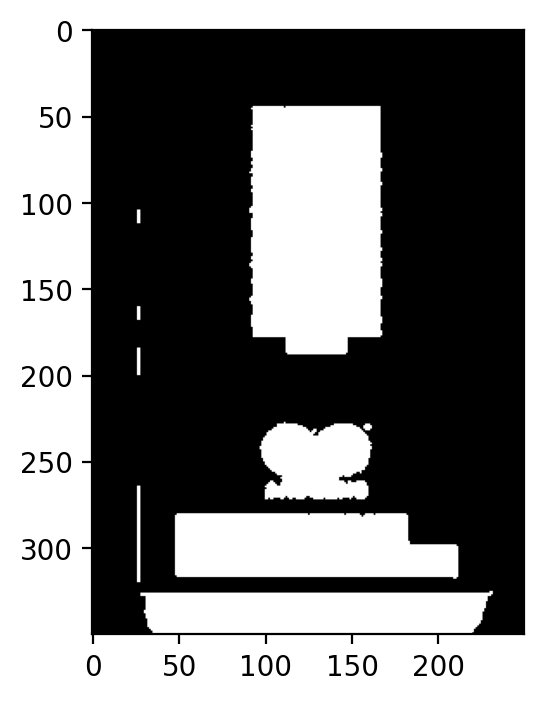

In [299]:
figure(dpi=200)
plt.imshow(im_fill_holes_240*denoised)

{0: 77805, 1: 9695}
{0: 7720, 1: 9695, 2: 70085}


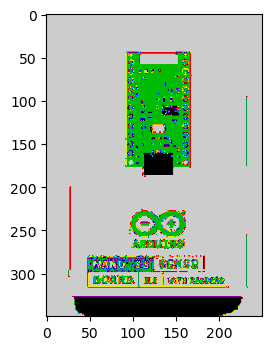

In [336]:
markers = np.zeros_like(im)
markers[im < 200] = 1
unique, counts = np.unique(markers, return_counts=True)
print(dict(zip(unique, counts)))
markers[im > 230] = 2
figure(dpi=100)
imshow(markers, cmap=plt.cm.nipy_spectral)
unique, counts = np.unique(markers, return_counts=True)
print(dict(zip(unique, counts)))

{1: 10487, 2: 77013}


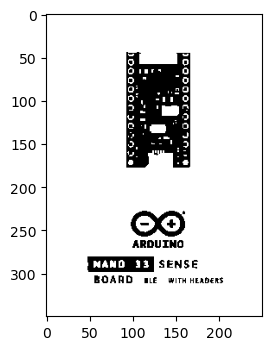

In [337]:
segmentation= seg.random_walker(im, markers,beta=100)
unique, counts = np.unique(segmentation, return_counts=True)
print(dict(zip(unique, counts)))
figure(dpi=100)
imshow(segmentation)

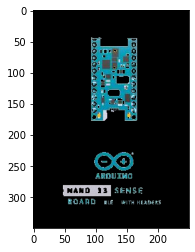

In [340]:
segmentation3 = np.repeat((segmentation==1)[:, :, np.newaxis], 3, axis=2)
imshow(segmentation3*image)
#saveim = Image.fromarray(np.uint8(segmentation3*image))
#saveim.save('seg.jpeg')

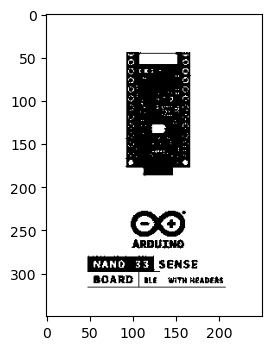

In [341]:
watershed = seg.watershed(im,markers)
figure(dpi=100)
imshow(watershed)

{0: 74713, 255: 12787}


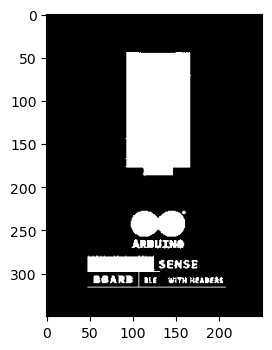

In [347]:

watershed_uint8 = np.zeros_like(watershed)
watershed_uint8[watershed == 1] = 255
watershed_uint8[watershed == 2] = 0
unique, counts = np.unique(watershed_uint8, return_counts=True)
print(dict(zip(unique, counts)))
watershed_fillhole = ndimage.binary_fill_holes(watershed_uint8).astype(np.uint8)
figure(dpi=100)
imshow(watershed_fillhole)

{0: 70396, 255: 17104}
{0: 70396, 255: 17104}
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False  True]]
{False: 70396, True: 17104}
{False: 70397, True: 17103}
{0: 70397, 1: 10632, 2: 2717, 3: 2812, 4: 206, 5: 736}
Number of objects: 5


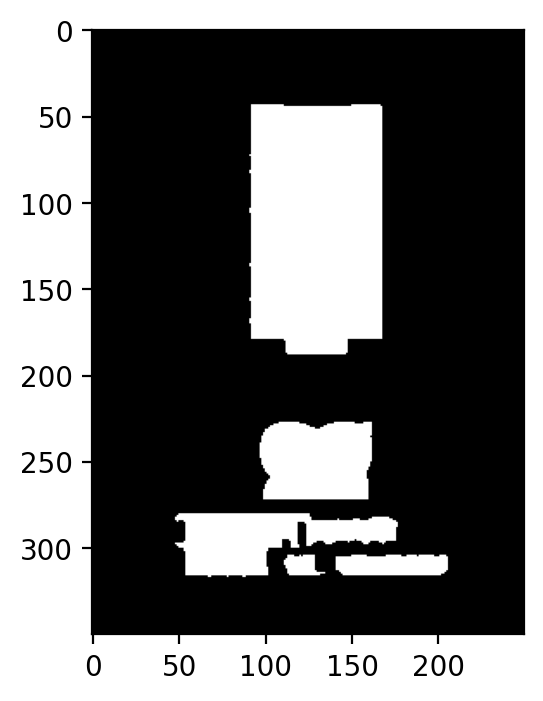

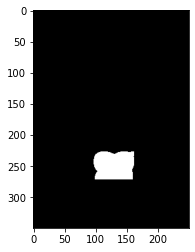

In [302]:
#min_sizeint, optional (default: 64)    The smallest allowable object size.
unique, counts = np.unique(final, return_counts=True)
print(dict(zip(unique, counts)))
final_bool = np.where(final == 1, False, final) 
unique, counts = np.unique(final_bool, return_counts=True)
print(dict(zip(unique, counts)))
final_bool = np.where(final == 255, True, final_bool) 
final_bool = np.array(final_bool, dtype=bool)
print(final_bool)
unique, counts = np.unique(final_bool, return_counts=True)
print(dict(zip(unique, counts)))

# (arbitrary shape, int or bool type)

# The array containing the objects of interest. 
# If the array type is int, the ints must be non-negative.

final_remove = skimage.morphology.remove_small_objects(final_bool, 50)
figure(dpi=200)
plt.imshow(final_remove)
unique, counts = np.unique(final_remove, return_counts=True)
print(dict(zip(unique, counts)))
final_labels, final_nbr_objects = measurements.label(final_remove)
figure()
unique, counts = np.unique(final_labels, return_counts=True)
print(dict(zip(unique, counts)))
plt.imshow(final_labels==2)
print ("Number of objects:", final_nbr_objects)

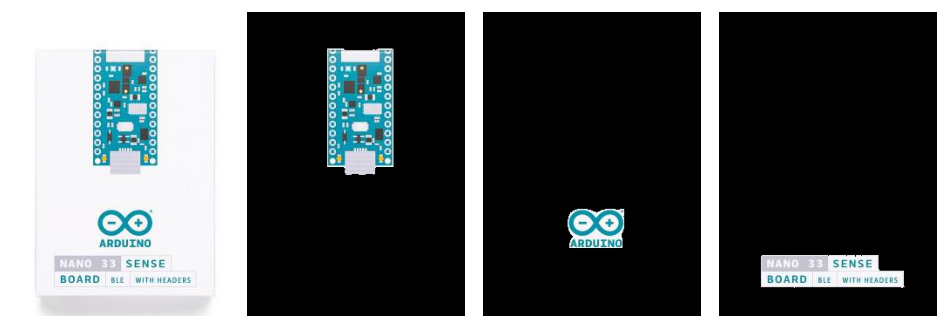

In [294]:
label1 = np.repeat((final_labels==1)[:, :, np.newaxis], 3, axis=2)
label2 = np.repeat((final_labels==2)[:, :, np.newaxis], 3, axis=2)
label3 = np.repeat((labels_clean==4)[:, :, np.newaxis], 3, axis=2)


label345 = (final_labels==3)+(final_labels==4)+(final_labels==5)
label345 = np.repeat((label345)[:, :, np.newaxis], 3, axis=2)


fig, axes = plt.subplots(1, 4, figsize=(8, 3), sharey=True,dpi=120)
axes[0].imshow(image)
axes[1].imshow(image * label1)
axes[2].imshow(image * label2)
axes[3].imshow(image * label3)

for a in axes:
    a.axis('off')

plt.tight_layout()

plt.show()